In [2]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

In [4]:
TRAIN_IMG_FOLDER = 'face data/Dataset/Train/'
TEST_IMG_FOLDER = 'face data/Dataset/Test/'

train_set_files = os.listdir(TRAIN_IMG_FOLDER)
test_set_files = os.listdir(TEST_IMG_FOLDER)

width  = 92
height = 112

In [5]:
print(len(train_set_files))
print(len(test_set_files))

240
160


In [6]:
train_image_names = os.listdir(TRAIN_IMG_FOLDER)
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

for i in range(len(train_image_names)):
    img = plt.imread(TRAIN_IMG_FOLDER + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()

test_image_names = os.listdir(TEST_IMG_FOLDER)
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for i in range(len(test_image_names)):
    img = imread(TEST_IMG_FOLDER + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()

In [7]:
print('training_tensor Shape:', training_tensor.shape)

training_tensor Shape: (240, 10304)


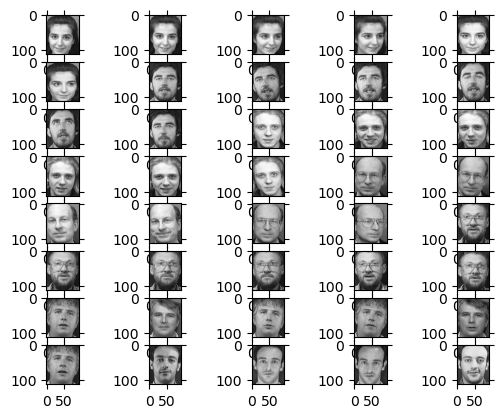

In [8]:
for i in range(40):
    img = training_tensor[i].reshape(height,width)
    plt.subplot(8,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

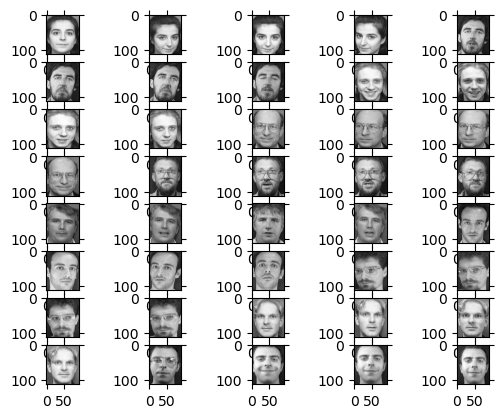

In [9]:
for i in range(40):
    img = testing_tensor[i].reshape(height,width)
    plt.subplot(8,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

# Mean Face

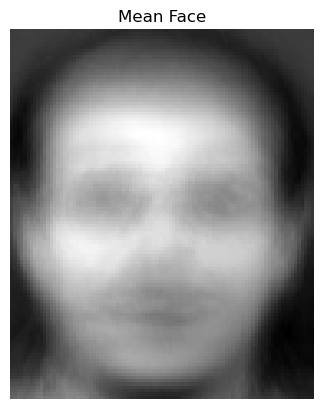

In [12]:
mean_face = np.mean(training_tensor, axis=0)
mean_face_image = mean_face.reshape(height, width)

# Display the mean face image
plt.imshow(mean_face_image, cmap='gray')
plt.title('Mean Face')
plt.axis('off')
plt.show()

## Difference betwwen train and mean vector

In [18]:
normalised_training_tensor = training_tensor - mean_face

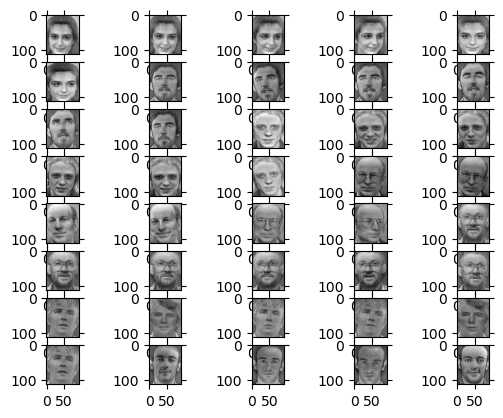

In [19]:
for i in range(40):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(8,5,1+i)
    plt.imshow(img, cmap='gray')
    #plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [20]:
trans_normalised_training_tensor = np.transpose(normalised_training_tensor, axes=(1, 0))

In [22]:
print(normalised_training_tensor.shape)
print(trans_normalised_training_tensor.shape)

(240, 10304)
(10304, 240)


# Co-Variance Matrix

In [23]:
cov_matrix_1=np.cov(trans_normalised_training_tensor)
print('Covariance Matrix 1 Shape:', cov_matrix_1.shape)
cov_matrix_1 = np.divide(cov_matrix_1,10304.0)

cov_matrix_2=np.cov(normalised_training_tensor)
print('Covariance Matrix 2 Shape:', cov_matrix_2.shape)
cov_matrix_2 = np.divide(cov_matrix_2,240.0)

Covariance Matrix 1 Shape: (10304, 10304)
Covariance Matrix 2 Shape: (240, 240)


# *Eigen Values*

In [24]:
eigenvalues_1, eigenvectors_1, = np.linalg.eig(cov_matrix_1)
print('eigenvalues_1.shape: {} eigenvectors_1.shape: {}'.format(eigenvalues_1.shape, eigenvectors_1.shape))

eigenvalues_1.shape: (10304,) eigenvectors_1.shape: (10304, 10304)


In [25]:
eigenvalues_2, eigenvectors_2, = np.linalg.eig(cov_matrix_2)
print('eigenvalues_2.shape: {} eigenvectors_2.shape: {}'.format(eigenvalues_2.shape, eigenvectors_2.shape))

eigenvalues_2.shape: (240,) eigenvectors_2.shape: (240, 240)


In [27]:
sorted_ind_1 = sorted(range(eigenvalues_1.shape[0]), key=lambda k: eigenvalues_1[k], reverse=True)
eigvalues_sort_1 = eigenvalues_1[sorted_ind_1]
eigvectors_sort_1 = eigenvectors_1[sorted_ind_1]

sorted_ind_2 = sorted(range(eigenvalues_2.shape[0]), key=lambda k: eigenvalues_2[k], reverse=True)
eigvalues_sort_2 = eigenvalues_2[sorted_ind_2]
eigvectors_sort_2 = eigenvectors_2[sorted_ind_2]

# **Cumulative Variance Of Principal Component**

d:\Anaconda\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\Anaconda\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


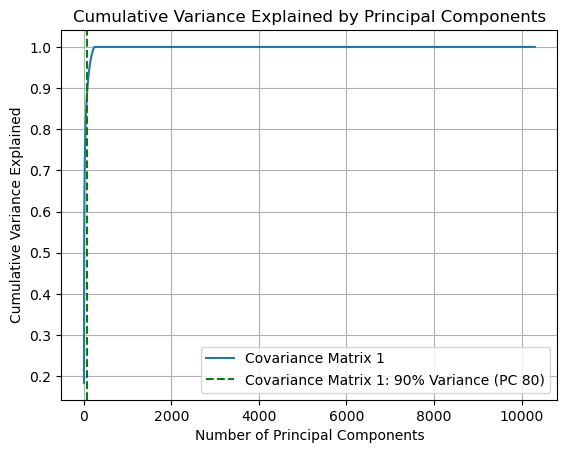

In [70]:
import matplotlib.pyplot as plt

cumulative_variance_1 = np.cumsum(eigvalues_sort_1) / np.sum(eigvalues_sort_1)
cumulative_variance_2 = np.cumsum(eigvalues_sort_2) / np.sum(eigvalues_sort_2)

index_90_1 = np.argmax(cumulative_variance_1 >= 0.90) + 1
index_90_2 = np.argmax(cumulative_variance_2 >= 0.90) + 1

plt.plot(range(1, len(cumulative_variance_1) + 1), cumulative_variance_1, label='Covariance Matrix 1')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.legend()
plt.grid(True)

plt.axvline(x=index_90_1, color='g', linestyle='--', label=f'Covariance Matrix 1: 90% Variance (PC {index_90_1})')

plt.legend()
plt.show()

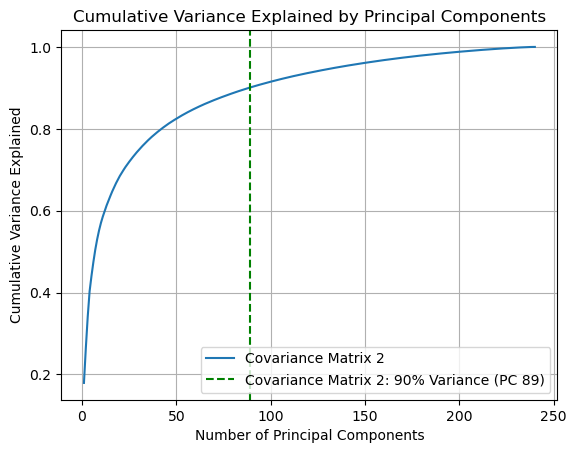

In [58]:
plt.plot(range(1, len(cumulative_variance_2) + 1), cumulative_variance_2, label='Covariance Matrix 2')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.legend()
plt.grid(True)

plt.axvline(x=index_90_2, color='g', linestyle='--', label=f'Covariance Matrix 2: 90% Variance (PC {index_90_2})')

plt.legend()
plt.show()

In [43]:
reduced_data_1 = np.array(eigvectors_sort_1[:80]).transpose()
reduced_data_1.shape

(10304, 80)

In [44]:
print(training_tensor.shape)
print(reduced_data_1.shape)

(240, 10304)
(10304, 80)


In [45]:
reduced_data_2 = np.array(eigvectors_sort_2[:90]).transpose()

print(training_tensor.shape)
print(reduced_data_2.shape)

(240, 10304)
(240, 90)


In [47]:
trans_reduced_data_1 = np.transpose(reduced_data_1, axes=(1, 0))

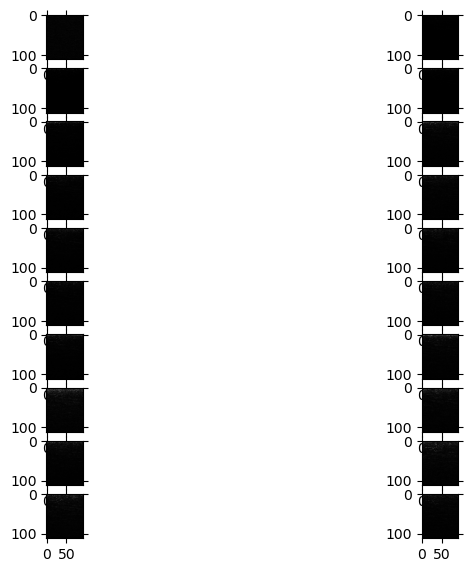

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming proj_data is your complex data
for i in range(20):
    # Convert complex data to magnitude
    img = np.abs(trans_reduced_data_1[i].reshape(height, width))

    plt.subplot(10, 2, 1 + i)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off', top='off', right='off', left='off', which='both')

plt.show()

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming proj_data is your complex data
for i in range(1):
    # Convert complex data to magnitude
    img = np.abs(trans_reduced_data_1[i].reshape(height, width))

img

array([[0.00429816, 0.01438103, 0.02014416, ..., 0.00385494, 0.00097234,
        0.00715693],
       [0.00113916, 0.00288805, 0.00232031, ..., 0.00197771, 0.0008885 ,
        0.00422776],
       [0.00337941, 0.00757447, 0.00539961, ..., 0.00280925, 0.00157735,
        0.00485219],
       ...,
       [0.00113964, 0.00026754, 0.00026754, ..., 0.0010534 , 0.00102449,
        0.00102449],
       [0.00125059, 0.00125059, 0.00091772, ..., 0.00144322, 0.00091172,
        0.00091172],
       [0.00149804, 0.00149804, 0.0016703 , ..., 0.00054548, 0.00054548,
        0.00048954]])

In [71]:
print(trans_reduced_data_1.shape)

(80, 10304)


In [69]:
w_1 = np.array([np.dot(trans_reduced_data_1,i) for i in normalised_training_tensor])
print(w_1.shape)

projdata = (np.dot(training_tensor.T, reduced_data_2)).T
print(projdata.shape)
w2 = np.array([np.dot(projdata,i) for i in normalised_training_tensor])
print(w_2.shape)

(240, 80)
(90, 10304)
(10304, 90)


In [54]:
def recogniser(test_image_names, train_image_names,proj_data,w, t0=2e8, prn=False):

    count        = 0
    num_images   = 0
    correct_pred = 0

    result = []
    wts = []

    #False match rate (FMR)
    FMR_count = 0

    #False non-match rate (FNMR)
    FNMR_count = 0


    test_image_names2 = sorted(test_image_names)

    for img in test_image_names2:

        unknown_face = plt.imread(TEST_IMG_FOLDER+img)
        num_images += 1

        unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
        normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

        w_unknown = np.dot(proj_data, normalised_uface_vector)
        diff  = w - w_unknown
        norms = np.linalg.norm(diff, axis=1)
        index = np.argmin(norms)

        wts.append([count, norms[index]])

        if prn: print('Input:'+'.'.join(img.split('.')[:2]), end='\t')
        count+=1

        match = img.split('_')[0] == train_image_names[index].split('_')[0]
        if norms[index] < t0: # It's a face
            if match:
                if prn: print('Matched:' + train_image_names[index], end = '\t')
                correct_pred += 1
                result.append(1)
            else:
                if prn: print('F/Matched:'+train_image_names[index], end = '\t')
                result.append(0)
                FMR_count += 1
        else:
            if match:
                if prn: print('Unknown face!'+train_image_names[index], end = '\t')
                FNMR_count +=1

            else:
                pass
                correct_pred += 1



        if prn: print(norms[index], end=' ')
        if prn: print()



    FMR = FMR_count/num_images
    FNMR = FNMR_count/num_images


    print('Correct predictions: {}/{} = {} \t\t'.format(correct_pred, num_images, correct_pred/num_images), end=' ')
    print('FMR: {} \t'.format(FMR), end=' ')
    print('FNMR: {} \t'.format(FNMR))



    return wts, result, correct_pred, num_images, FMR, FNMR


wts, result, correct_pred, num_images, FMR, FNMR =recogniser(test_image_names, train_image_names, trans_reduced_data_1, w_1, t0=2e8, prn=True)

Input:s10_10.pgm	F/Matched:s9_4.pgm	93.36860168274154 
Input:s10_7.pgm	Matched:s10_3.pgm	78.14637721104612 
Input:s10_8.pgm	Matched:s10_2.pgm	61.82135905308798 
Input:s10_9.pgm	F/Matched:s30_6.pgm	98.23257550462984 
Input:s11_10.pgm	Matched:s11_1.pgm	64.23584702170841 
Input:s11_7.pgm	Matched:s11_1.pgm	77.1392753991343 
Input:s11_8.pgm	F/Matched:s27_6.pgm	99.9544979345566 
Input:s11_9.pgm	F/Matched:s27_6.pgm	78.66738950286867 
Input:s12_10.pgm	Matched:s12_5.pgm	65.77278181492404 
Input:s12_7.pgm	Matched:s12_5.pgm	64.93538381305352 
Input:s12_8.pgm	Matched:s12_1.pgm	59.533918231026604 
Input:s12_9.pgm	Matched:s12_5.pgm	70.27716034555914 
Input:s13_10.pgm	Matched:s13_5.pgm	43.3774046229684 
Input:s13_7.pgm	Matched:s13_5.pgm	55.31441233463757 
Input:s13_8.pgm	Matched:s13_1.pgm	49.82952627691133 
Input:s13_9.pgm	Matched:s13_5.pgm	66.45142700895987 
Input:s14_10.pgm	Matched:s14_6.pgm	75.05968067261978 
Input:s14_7.pgm	F/Matched:s19_5.pgm	87.84907266708 
Input:s14_8.pgm	F/Matched:s28_4.pgm	8

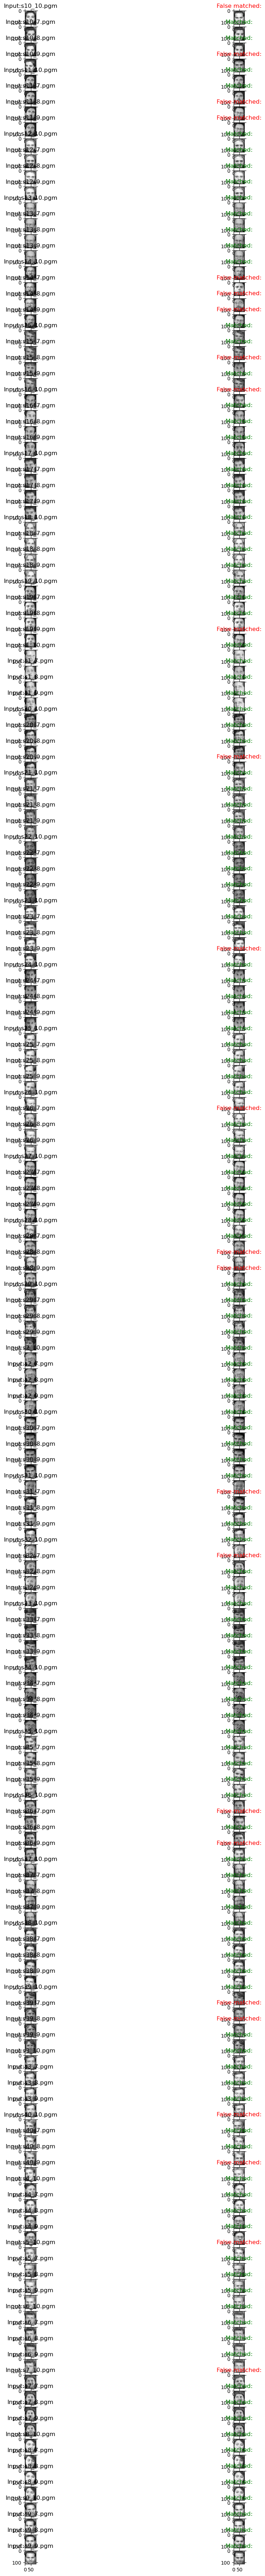

In [56]:
count        = 0
num_images   = 0
correct_pred = 0
def Visualization(img, train_image_names,trans_reduced_data,w, t0):
    global count,highest_min,num_images,correct_pred
    unknown_face        = plt.imread(TEST_IMG_FOLDER+img)
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

    plt.subplot(160,2,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

    w_unknown = np.dot(trans_reduced_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)




    plt.subplot(160,2,1+count)
    if norms[index] < t0: # It's a face

        match = img.split('_')[0] == train_image_names[index].split('_')[0]
        #if img.split('.')[0] == train_image_names[index].split('.')[0]:
        if match:
            #plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
            plt.title('Matched:', color='g')
            plt.imshow(imread(TRAIN_IMG_FOLDER+train_image_names[index]), cmap='gray')

            correct_pred += 1
        else:
            #plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
            plt.title('False matched:', color='r')
            plt.imshow(imread(TRAIN_IMG_FOLDER+train_image_names[index]), cmap='gray')
    else:
        #if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
        if img.split('_')[0] not in [i.split('_')[0] for i in train_image_names]:
            plt.title('Unknown face', color='g')
            correct_pred += 1
        else:
            plt.title('Unknown face', color='r')

    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.subplots_adjust(right=1.2, top=2.5)

    count+=1


fig = plt.figure(figsize=(10, 30))

test_image_names2 = sorted(test_image_names)
for i in range(len(test_image_names2)):
    Visualization(test_image_names2[i], train_image_names,trans_reduced_data_1,w_1, t0=2.7e7)

plt.show()

In [61]:
reduced_data_2_transposed = reduced_data_2.T

# Multiply the transposed reduced eigenvectors with the normalized training tensor to get eigenfaces
eigenfaces_2 = np.dot(reduced_data_2_transposed, normalised_training_tensor)

# Transpose the result to get each eigenface as a column vector
eigenfaces_2 = eigenfaces_2.T

In [63]:
print(eigenfaces_2.shape)

(10304, 90)
